In [2]:
import numpy as np
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix , classification_report




In [3]:
df = pd.read_csv("Twiiter.csv",encoding="ISO-8859-1",names = ['target','id','date','flag','user','text'])

In [4]:
df.sample(5)

,target,id,date,flag,user,text
75735,0,1695304935,Mon May 04 05:47:43 PDT 2009,NO_QUERY,RobPattzx3,Brother finallyyyy left for school. soo sickk ...
1509791,4,2174863478,Sun Jun 14 23:29:45 PDT 2009,NO_QUERY,PinkPanniez,Sorry! i had 2 come back 2 say @mariosouldtrut...
78562,0,1751422382,Sat May 09 19:24:49 PDT 2009,NO_QUERY,bripoe,"@mtgdude oh no! I'm sorry, I hope he's ok and ..."
73931,0,1694663638,Mon May 04 03:37:25 PDT 2009,NO_QUERY,_done,"maths exam tomorrow, and im feeling so awful a..."
1297285,4,2004475593,Tue Jun 02 08:15:33 PDT 2009,NO_QUERY,spiffingjewelry,@andreabaker816 you're not invisible. I see you.


In [5]:
df.shape

(1600000, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   id      1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [7]:
df.describe()

,target,id
count,1.600000e+06,1.600000e+06
mean,2.000000e+00,1.998818e+09
std,2.000001e+00,1.935761e+08
min,0.000000e+00,1.467810e+09
25%,0.000000e+00,1.956916e+09
50%,2.000000e+00,2.002102e+09
75%,4.000000e+00,2.177059e+09
max,4.000000e+00,2.329206e+09


In [8]:
df.duplicated().sum()

0

<AxesSubplot: >

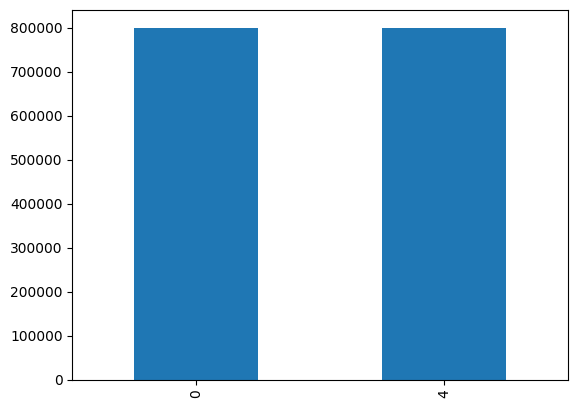

In [9]:
df['target'].value_counts().plot(kind='bar')

In [10]:
port_stem = PorterStemmer()

def PreProcessing(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ', content)
    stemmed_content =  re.sub(r"@[^\s]+", "", content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = " ".join(stemmed_content)
    return stemmed_content

In [11]:
df['text'] = df['text'].apply(PreProcessing)

In [12]:
feature = df['text']
label = df['target']

In [13]:
X_train,X_test,Y_train,Y_test = train_test_split(feature,label,test_size=0.2)

In [14]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train)

CountVectorizer()

In [15]:
X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)

In [16]:
classifier = LogisticRegression(max_iter=1000)
classifier.fit(X_train,Y_train)


LogisticRegression(max_iter=1000)

In [26]:

print(classifier.score(X_test,Y_test))

0.776421875


In [35]:
tweet = input("Enter the tweet : ")
vecttweet = vectorizer.transform(np.array([tweet]))

ans = classifier.predict(vecttweet)

if(ans[0] == 4):
    print("Positive")

else:
    print("Negative")

Negative


In [36]:
tweet = "Best tweet ever"
vecttweet = vectorizer.transform(np.array([tweet]))

ans = classifier.predict(vecttweet)

if(ans[0] == 4):
    print("Positive")

else:
    print("Negative")

Positive


In [37]:
tweet = "Mondays are the worst"
vecttweet = vectorizer.transform(np.array([tweet]))

ans = classifier.predict(vecttweet)

if(ans[0] == 4):
    print("Positive")

else:
    print("Negative")

Negative
